In [4]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv("E:/Full Stack Data Scientist Bootcamp/Feature-Engineering-Live-sessions-master/Feature-Engineering-Live-sessions-master/mobile_dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
x=df.iloc[:,:-1]

In [7]:
y=df.iloc[:,-1:]

In [8]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


#### Using the SelectKBest --- for featrue importance 

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
score_of_best=SelectKBest(score_func=chi2,k=20)
score_of_best.fit(x,y)

SelectKBest(k=20, score_func=<function chi2 at 0x0000022CE1903C10>)

In [11]:
score_of_best_in_dataframe=pd.DataFrame(score_of_best.scores_)
score_of_best_in_dataframe

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [12]:
score_of_best_in_dataframe.columns=['Score']

In [13]:
score_of_best_in_dataframe

,Score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [14]:
x_col=pd.DataFrame(x.columns)

In [15]:
x_col.columns=['columns']

In [16]:
x_col

,columns
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [17]:
score_of_columns_in_dataframe=pd.concat([x_col,score_of_best_in_dataframe],axis=1)
score_of_columns_in_dataframe

,columns,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [18]:
top_10_rank_col=score_of_columns_in_dataframe.nlargest(10,'Score')
top_10_rank_col

,columns,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### Freature Importance by using the ExtraTreeClassifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
clf_tree=ExtraTreesClassifier()


In [21]:
clf_tree.fit(x,y)

C:\Users\Muhammad Talha Awan\AppData\Local\Temp\ipykernel_12632\2242854775.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_tree.fit(x,y)


ExtraTreesClassifier()

In [22]:
clf_tree.feature_importances_

array([0.06027065, 0.01998391, 0.03308733, 0.01850504, 0.03161542,
       0.01661026, 0.0339431 , 0.03364209, 0.03576739, 0.0324106 ,
       0.03389394, 0.04681017, 0.04952312, 0.40345502, 0.03319131,
       0.03312863, 0.03369983, 0.0132495 , 0.0176468 , 0.01956587])

In [25]:
freature_importance=pd.Series(clf_tree.feature_importances_,index=x.columns)

In [26]:
freature_importance

battery_power    0.060271
blue             0.019984
clock_speed      0.033087
dual_sim         0.018505
fc               0.031615
four_g           0.016610
int_memory       0.033943
m_dep            0.033642
mobile_wt        0.035767
n_cores          0.032411
pc               0.033894
px_height        0.046810
px_width         0.049523
ram              0.403455
sc_h             0.033191
sc_w             0.033129
talk_time        0.033700
three_g          0.013250
touch_screen     0.017647
wifi             0.019566
dtype: float64

<AxesSubplot:>

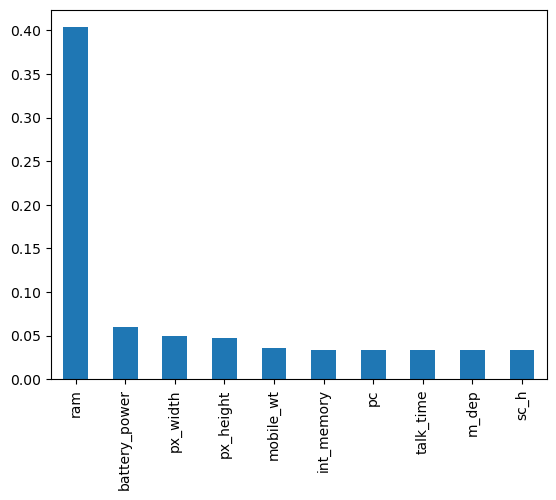

In [31]:
freature_importance.nlargest(10).plot(kind='bar')

#### By Using the Corrrelation

In [32]:
x.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


In [33]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:>

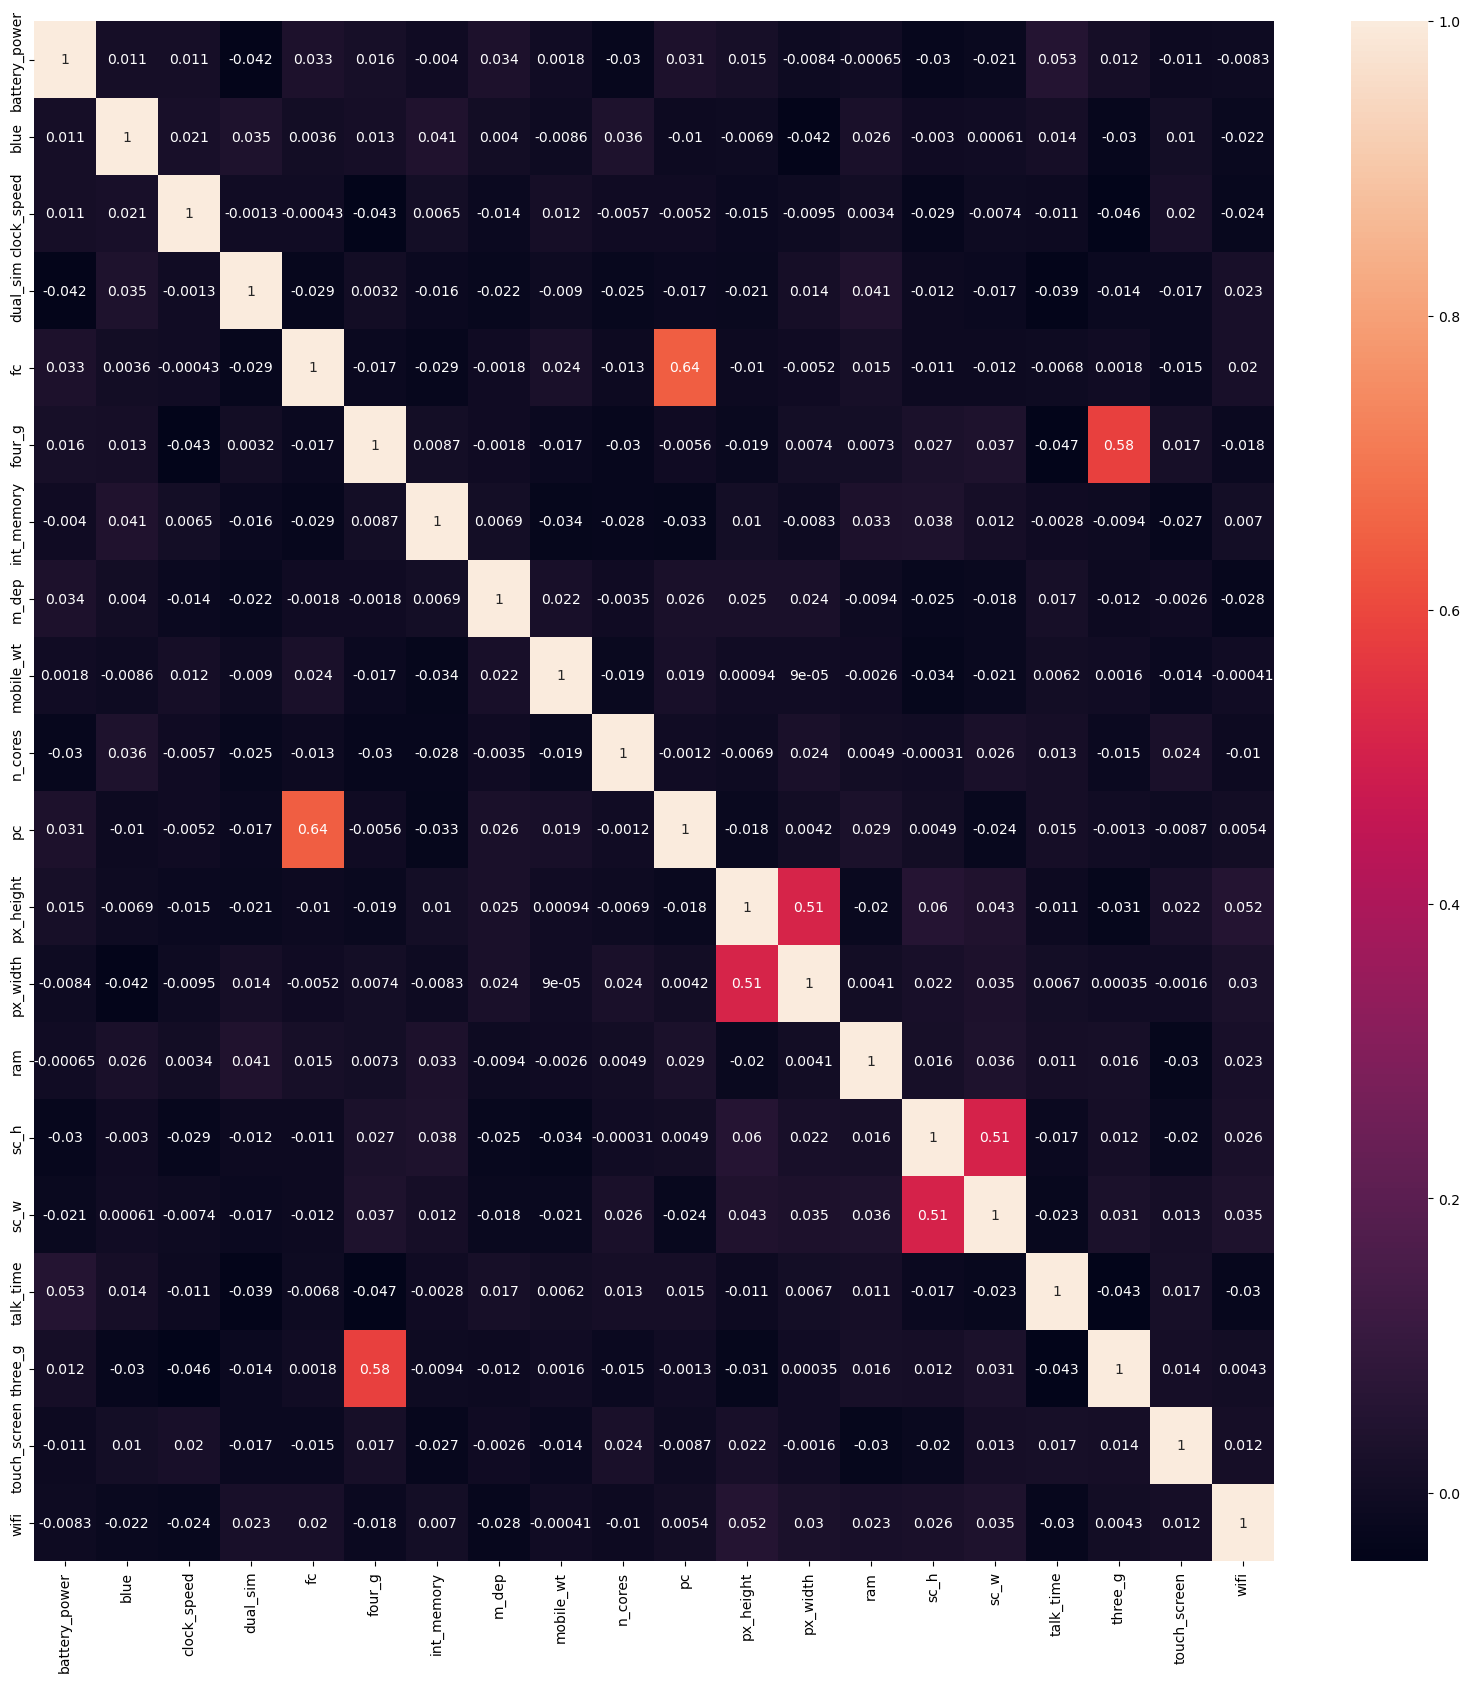

In [46]:
plt.figure(figsize=(20,20))
sb.heatmap(x.corr(),annot=True)

In [74]:
def find_multicorr(x,th):
    hight_corr=dict()
    corr=x.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if (corr.iloc[i,j])>th:
                hight_corr[corr.columns[i]]=corr.columns[j]
            
              
    return hight_corr

In [97]:
find_multicorr(x,0.51)

{'pc': 'fc', 'px_width': 'px_height', 'three_g': 'four_g'}

In [47]:
corr=x.corr()

In [51]:
len(corr.columns)

20

In [69]:
for i in range(len(corr.columns)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [99]:
corr.columns[1]

'blue'

#### Using the Infromation Gain

In [103]:
from sklearn.feature_selection import mutual_info_classif
mutal_information=mutual_info_classif(x,y)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
mutal_information_df=pd.Series(mutal_information,index=x.columns)

In [113]:
mutal_information_df.sort_values(ascending=False)

ram              0.847900
battery_power    0.029907
px_height        0.025997
px_width         0.025305
mobile_wt        0.024739
int_memory       0.015026
m_dep            0.008795
clock_speed      0.008721
sc_w             0.005133
three_g          0.003720
touch_screen     0.000855
n_cores          0.000307
sc_h             0.000000
talk_time        0.000000
pc               0.000000
blue             0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
wifi             0.000000
dtype: float64